In [1]:
# Import the dependencies.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-5.537246279669219 167.62063679571372
-14.332490420152936 -139.65011916632633
39.568326943058366 109.94885152605474
25.901642119327093 33.758551545647805
-37.02398736767364 161.00263798381377
-65.42281623737333 55.24295324059264
-1.4966004838492921 -113.98747137658896
0.6436076907329493 72.27184599365211
-30.33447558578238 -55.95403181980397
-50.3738845280372 122.37712583280711
18.45493051281153 -72.17889998522142
-29.043391951197577 174.8043358573869
38.66558612759076 80.23007445565509
60.7842568054472 -79.45521090989249
87.04972459873642 73.66382695285915
69.74578459985369 112.35001702550056
-42.80093368067953 -17.002798112117944
55.44788092137989 -27.153807186979606
-4.1144612387465855 -29.18315594587662
23.327310114434752 -92.3997897214536
-7.876071810227359 29.075781543155813
29.804287521721164 102.61988089717926
-55.33986158472559 -69.38507731349057
44.95210828387667 65.96417594907848
58.8261321890497 91.29910428391668
15.48394795107842 25.06537094022164
49.36815695375148 50.4400

16.806944575286053 -115.79741464273856
-5.003366246884696 -155.83726049268435
-38.98647675542455 25.77213727626969
68.18230724672841 -19.955458708280645
24.48326083685086 172.7563187192245
-50.55171920210968 7.436874674623283
-23.138027828364898 -56.781831487620764
-16.47615270587103 -61.283539308796264
81.53374368416291 54.43805221454164
18.330377652383007 36.1118822156206
-37.1135751960013 -87.48796429094043
-61.19290348513227 -140.52110492973992
-7.0016548618412315 179.94260435844893
0.846100106023215 0.94507428275395
-0.4375503098440561 -4.9434913195950685
31.218364714153097 -170.67451811050043
-20.503940314260404 -28.184032542206523
-25.638533133009688 53.09927200458776
-85.10490121511889 -9.735996619701353
-76.63915894982148 -152.9547013279514
-63.691166067942746 -6.32923896484769
73.40438719924458 -41.88610595978318
87.11280616077309 -73.65261245820001
64.02234809300421 5.128042498346133
5.826920992013498 -136.35216822161527
-5.480315852140194 46.94425022809699
-45.1820513221573

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will ass it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficent count.
len(cities)

633

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bfb185c01e314a2d00457cc8ae85f7bb


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | dongsheng
Processing Record 4 of Set 1 | safaga
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | coahuayana
Processing Record 8 of Set 1 | thinadhoo
Processing Record 9 of Set 1 | quarai
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kenscoff
Processing Record 12 of Set 1 | kaeo
Processing Record 13 of Set 1 | aksu
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | natal
Processing Record 20 of Set 1 | celestun
Processing Record 21 of Set 1 | kaputa
Processing Record 22 of Set 1 | yaan
Proc

Processing Record 36 of Set 4 | caconda
Processing Record 37 of Set 4 | katsuura
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | madang
Processing Record 40 of Set 4 | bukama
Processing Record 41 of Set 4 | pallasovka
Processing Record 42 of Set 4 | waingapu
Processing Record 43 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 44 of Set 4 | sopo
Processing Record 45 of Set 4 | bagotville
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | smolenka
Processing Record 48 of Set 4 | genhe
Processing Record 49 of Set 4 | abay
Processing Record 50 of Set 4 | zapolyarnyy
Processing Record 1 of Set 5 | tarudant
City not found. Skipping...
Processing Record 2 of Set 5 | guangyuan
Processing Record 3 of Set 5 | kabompo
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | campechuela
Processing Record 7 of Set 5 | mersing
Processing Record 8 of Set 5 | baykit
Process

City not found. Skipping...
Processing Record 24 of Set 8 | pangody
Processing Record 25 of Set 8 | kaitangata
Processing Record 26 of Set 8 | hornepayne
Processing Record 27 of Set 8 | oxford
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | muravlenko
Processing Record 30 of Set 8 | uzumlu
City not found. Skipping...
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | najran
Processing Record 33 of Set 8 | rungata
City not found. Skipping...
Processing Record 34 of Set 8 | amahai
Processing Record 35 of Set 8 | mikhaylovskoye
Processing Record 36 of Set 8 | maicao
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | bingol
Processing Record 39 of Set 8 | kodinsk
Processing Record 40 of Set 8 | shenjiamen
Processing Record 41 of Set 8 | kumluca
Processing Record 42 of Set 8 | dawlatabad
Processing Record 43 of Set 8 | dawei
Processing Record 44 of Set 8 | mitu
Processing Record 45 of Set 8 | tual
Pro

Processing Record 8 of Set 12 | rosarito
Processing Record 9 of Set 12 | miri
Processing Record 10 of Set 12 | rorvik
Processing Record 11 of Set 12 | keetmanshoop
Processing Record 12 of Set 12 | san patricio
Processing Record 13 of Set 12 | bagan
Processing Record 14 of Set 12 | bay roberts
Processing Record 15 of Set 12 | inirida
Processing Record 16 of Set 12 | lapao
Processing Record 17 of Set 12 | nogliki
Processing Record 18 of Set 12 | san juan de los morros
Processing Record 19 of Set 12 | college
Processing Record 20 of Set 12 | tagusao
Processing Record 21 of Set 12 | katakwi
Processing Record 22 of Set 12 | gazanjyk
Processing Record 23 of Set 12 | tura
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | umm lajj
Processing Record 27 of Set 12 | aksarka
Processing Record 28 of Set 12 | gangotri
City not found. Skipping...
Processing Record 29 of Set 12 | obidos
Processing Reco

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,66.74,64,0,4.18,PT,2022-07-24 19:44:23
1,Atuona,-9.8000,-139.0333,77.34,63,69,19.55,PF,2022-07-24 19:44:23
2,Dongsheng,39.8161,109.9776,67.23,59,100,11.81,CN,2022-07-24 19:44:24
3,Safaga,26.7292,33.9365,88.72,35,49,8.93,EG,2022-07-24 19:44:24
4,Port Macquarie,-31.4333,152.9167,44.89,90,5,5.28,AU,2022-07-24 19:43:22
5,Coahuayana,18.7333,-103.6833,92.30,48,46,7.09,MX,2022-07-24 19:44:25
6,Thinadhoo,0.5333,72.9333,82.18,73,100,7.85,MV,2022-07-24 19:44:25
7,Quarai,-30.3875,-56.4514,70.18,83,100,7.07,BR,2022-07-24 19:44:25
8,Albany,42.6001,-73.9662,96.58,39,58,1.99,US,2022-07-24 19:44:26
9,Kenscoff,18.4506,-72.2869,73.54,58,40,13.80,HT,2022-07-24 19:44:26


In [12]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2022-07-24 19:44:23,40.1629,-8.3327,66.74,64,0,4.18
1,Atuona,PF,2022-07-24 19:44:23,-9.8000,-139.0333,77.34,63,69,19.55
2,Dongsheng,CN,2022-07-24 19:44:24,39.8161,109.9776,67.23,59,100,11.81
3,Safaga,EG,2022-07-24 19:44:24,26.7292,33.9365,88.72,35,49,8.93
4,Port Macquarie,AU,2022-07-24 19:43:22,-31.4333,152.9167,44.89,90,5,5.28
5,Coahuayana,MX,2022-07-24 19:44:25,18.7333,-103.6833,92.30,48,46,7.09
6,Thinadhoo,MV,2022-07-24 19:44:25,0.5333,72.9333,82.18,73,100,7.85
7,Quarai,BR,2022-07-24 19:44:25,-30.3875,-56.4514,70.18,83,100,7.07
8,Albany,US,2022-07-24 19:44:26,42.6001,-73.9662,96.58,39,58,1.99
9,Kenscoff,HT,2022-07-24 19:44:26,18.4506,-72.2869,73.54,58,40,13.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

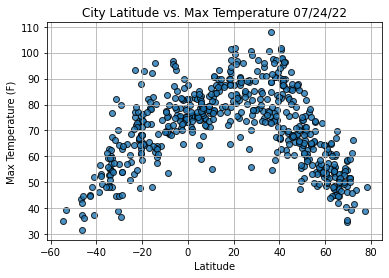

In [16]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

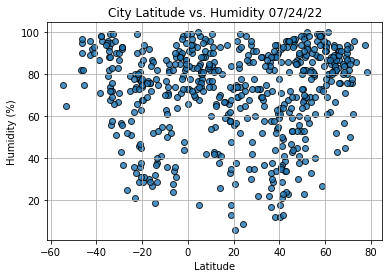

In [17]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

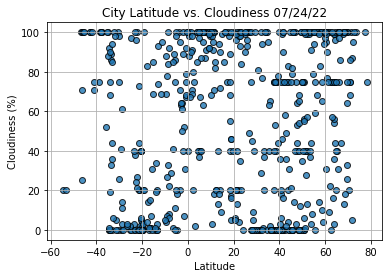

In [18]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

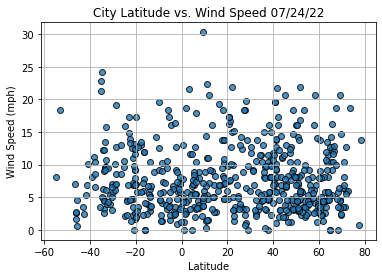

In [19]:
# Import time module 
import time

# Build the scatter plot for lattitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()